## **Supply Chain Analysis**
### The dataset comprises various features related to the fashion and  makeup product supply chain

#importing libraries


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading data


In [24]:
data = pd.read_csv('/content/supply_chain_data.csv')

In [25]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [26]:
#100 row & 24 column
data.shape

(100, 24)

In [27]:
# let's know dtype for every column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

# EDA

## descriptive statistics of the dataset:


In [28]:
# data.describe()

In [29]:
data['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

### we have 3 Product :
---
*   haircare
*   cosmetics
*   skincare






In [30]:
data['Location'].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

### we import from 5 Cities :
*   Mumbai
*   Kolkata
*   Delhi
*   Bangalore
*   Chennai




In [31]:
data['Transportation modes'].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

### we have 4 Transportation modes :
*   Road
*   Air
*   Rail
*   Sea






In [32]:
data['Supplier name'].unique()

array(['Supplier 3', 'Supplier 1', 'Supplier 5', 'Supplier 4',
       'Supplier 2'], dtype=object)

## Product Analysis

### Number of products sold

In [33]:
sales = data.groupby(['Product type'])['Number of products sold'].sum().reset_index()

In [34]:
sales

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


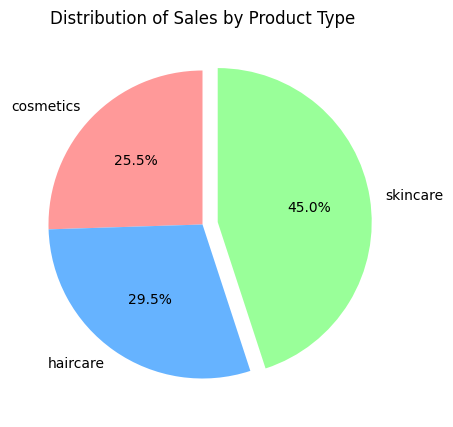

In [35]:
sales = data.groupby(['Product type'])['Number of products sold'].sum().reset_index()
explode = (0, 0, 0.1)

colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(5, 5))
plt.pie(sales['Number of products sold'], labels=sales['Product type'], autopct='%1.1f%%', startangle=90,
        explode=explode, colors=colors)

plt.title('Distribution of Sales by Product Type')
plt.show()

**45% of the sales comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics.**


### Top Product by revenue


In [62]:
top_products = product_type_revenue.groupby('Product type')['Revenue generated'].sum()
top_products.sort_values()

Product type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: Revenue generated, dtype: float64

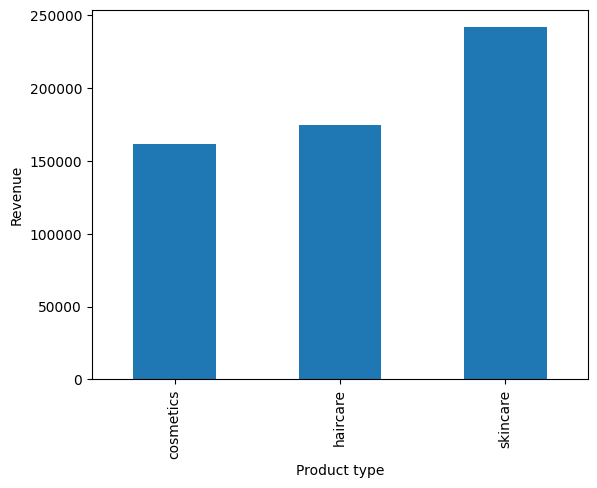

In [37]:
top_products.plot(kind = 'bar')
plt.ylabel('Revenue')
plt.show()

##SKUs Analysis

### Top 5 SKUs by Revenue for Each Product Type

In [38]:
product_type_revenue  = data.groupby(['Product type','SKU'])['Revenue generated'].sum().reset_index()

In [39]:
product_type_revenue

,Product type,SKU,Revenue generated
0,cosmetics,SKU17,2629.396435
1,cosmetics,SKU21,7087.052696
2,cosmetics,SKU23,8858.367571
3,cosmetics,SKU27,2686.457224
4,cosmetics,SKU28,6117.324615
...,...,...,...
95,skincare,SKU82,2943.381868
96,skincare,SKU86,1229.591029
97,skincare,SKU9,4971.145988
98,skincare,SKU90,9592.633570


In [40]:
def get_top_skus(group):
    return group.nlargest(5, 'Revenue generated')

top_skus_by_product_type = product_type_revenue.groupby(data['Product type'] , group_keys=False).apply(get_top_skus)


In [41]:
top_skus_by_product_type.sort_values(by = ['Product type' , 'Revenue generated'] , ascending=[True , False])

,Product type,SKU,Revenue generated
8,cosmetics,SKU38,9692.318040
20,cosmetics,SKU88,9444.742033
2,cosmetics,SKU23,8858.367571
40,haircare,SKU51,9866.465458
29,haircare,SKU2,9577.749626
28,haircare,SKU18,9364.673505
31,haircare,SKU24,9049.077861
26,haircare,SKU0,8661.996792
70,skincare,SKU31,9655.135103
98,skincare,SKU90,9592.633570


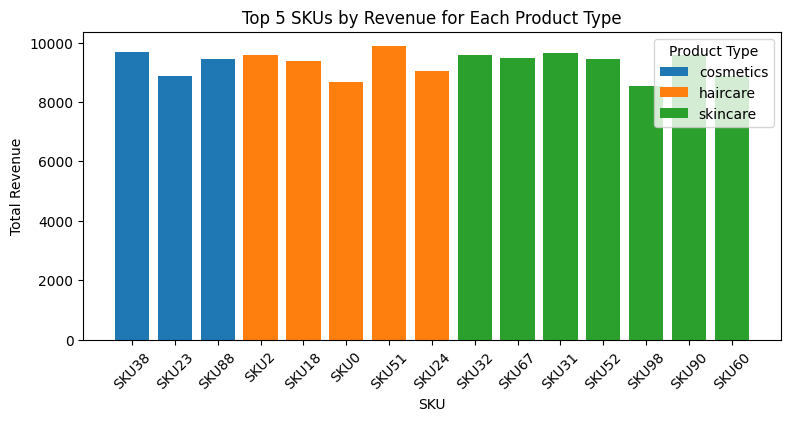

In [42]:
plt.figure(figsize=(9, 4))
for product_type, data_ in top_skus_by_product_type.groupby('Product type'):
    plt.bar(data_['SKU'], data_['Revenue generated'], label=product_type)

plt.title('Top 5 SKUs by Revenue for Each Product Type')
plt.xlabel('SKU')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.show()

## Shipping Analysis

### Revenue for each Shipping Carriers

In [43]:
revenue_by_shipping = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

In [44]:
revenue_by_shipping

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


<Axes: xlabel='Shipping carriers', ylabel='Revenue generated'>

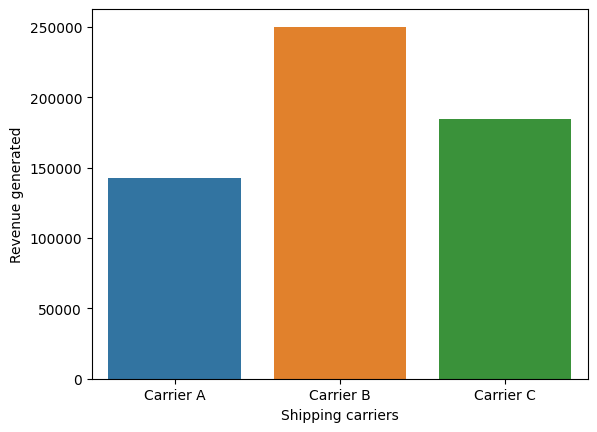

In [45]:
sns.barplot(x = 'Shipping carriers' , y = 'Revenue generated' , data = revenue_by_shipping)

 Carrier B helps the company in generating more revenue



---



**avg_lead_time & avg_manufacturing_costs**


---


*NOTE lead_time: the amount of time that passes from the start of a process until its conclusion.*

In [46]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157





### Cost Of Shipping For Carriers




In [47]:
costOfshipping = data.groupby(['Shipping carriers','Location','Product type'])['Shipping costs'].mean().reset_index()


<Figure size 800x1000 with 0 Axes>

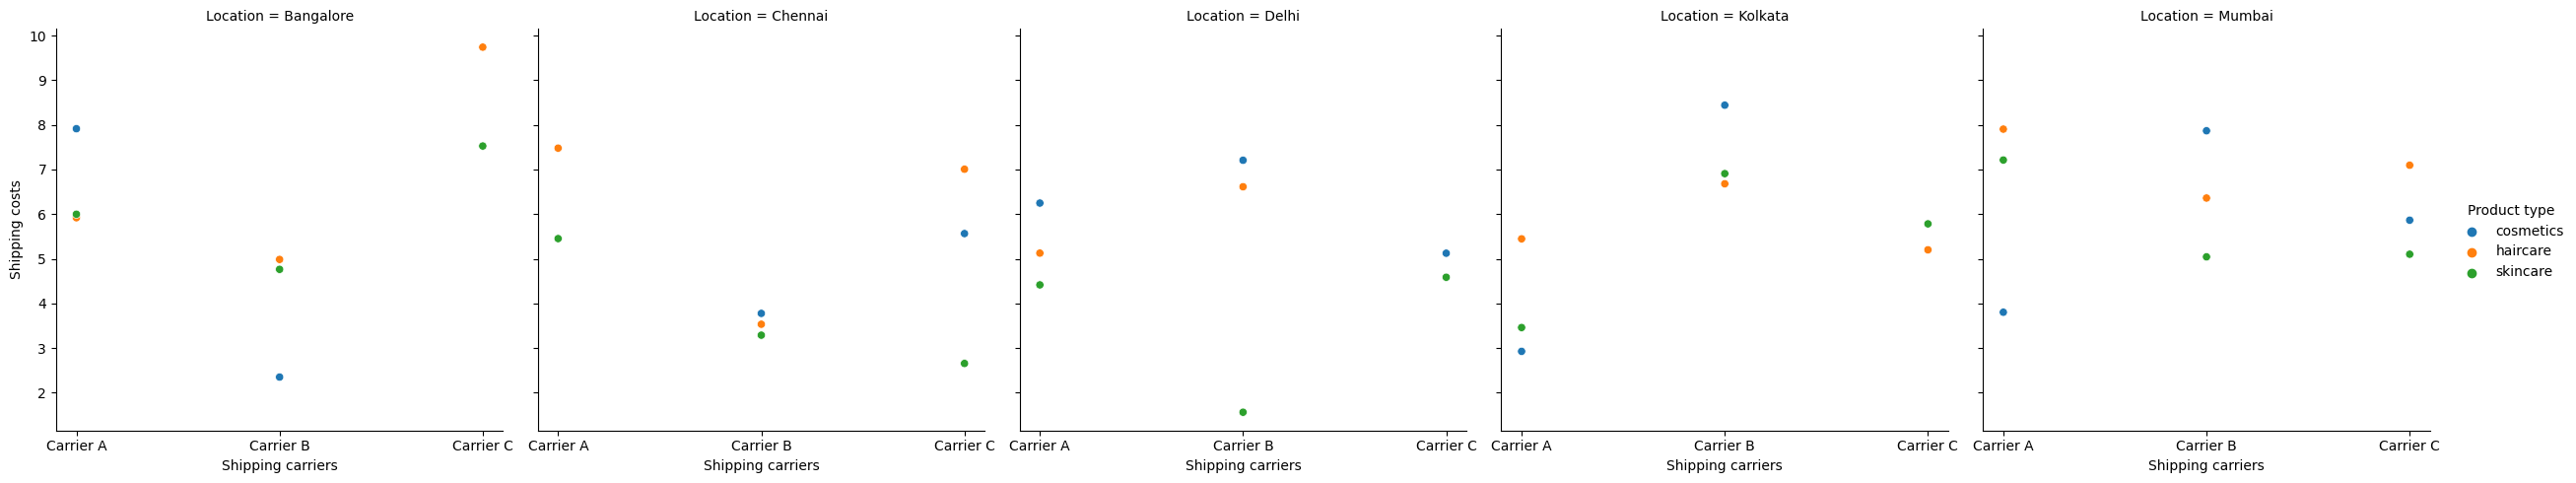

In [48]:
plt.figure(figsize = (8,10))
shipping_cost_chart = sns.relplot(data = costOfshipping, x='Shipping carriers', y='Shipping costs' ,col = 'Location' , hue = 'Product type')
plt.show()

**we can see `Cosmetics` shipping cost in Carrier B from Bangalora lower than any Carrier & `Hair care` from carrier B (Chenai) the lowest cost & `Skincare` in carrier A From Kolkata is lowest cost**

## Location Analysis

### Revenue for each city

In [49]:
Location_sales_revenue = data.groupby(['Location' , 'Product type'],as_index=False)['Revenue generated'].sum()

<Axes: xlabel='Product type', ylabel='Revenue generated'>

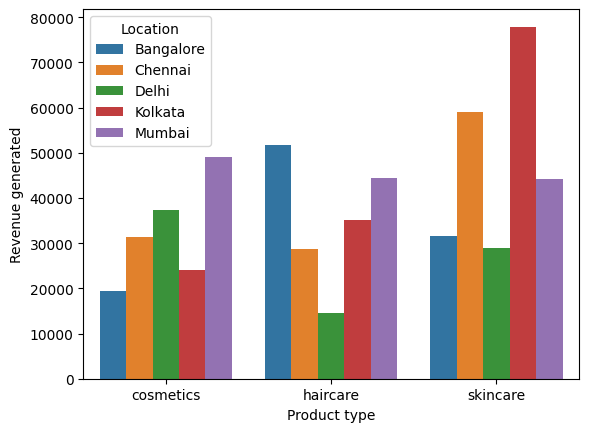

In [50]:
sns.barplot(x = 'Product type' ,y ='Revenue generated' ,hue = 'Location', data = Location_sales_revenue)

 **as we see Revenu of Cosmetics we Import from Mumbai is the Highest
and Haircare from Bangalore and Skincare From kolkata
all these countries the highest revenu for our Products**



---





### Number of `products sold` for each product and the City we import that product from ?

In [51]:
Location_sales = data.groupby(['Location' , 'Product type'],as_index=False)['Number of products sold'].sum()

In [52]:
Location_sales.sort_values(by = ['Location','Number of products sold'] , ascending = [True , False])

,Location,Product type,Number of products sold
1,Bangalore,haircare,2160
2,Bangalore,skincare,1719
0,Bangalore,cosmetics,1541
5,Chennai,skincare,4704
4,Chennai,haircare,2321
3,Chennai,cosmetics,1743
6,Delhi,cosmetics,4003
8,Delhi,skincare,3106
7,Delhi,haircare,2606
11,Kolkata,skincare,8101


In [53]:
heatmap_data = Location_sales.pivot_table(values='Number of products sold', index='Product type', columns='Location', fill_value=0)
heatmap_data

Location,Bangalore,Chennai,Delhi,Kolkata,Mumbai
Product type,,,,,
cosmetics,1541,1743,4003,1262,3208
haircare,2160,2321,2606,3407,3117
skincare,1719,4704,3106,8101,3101


<Axes: xlabel='Product type'>

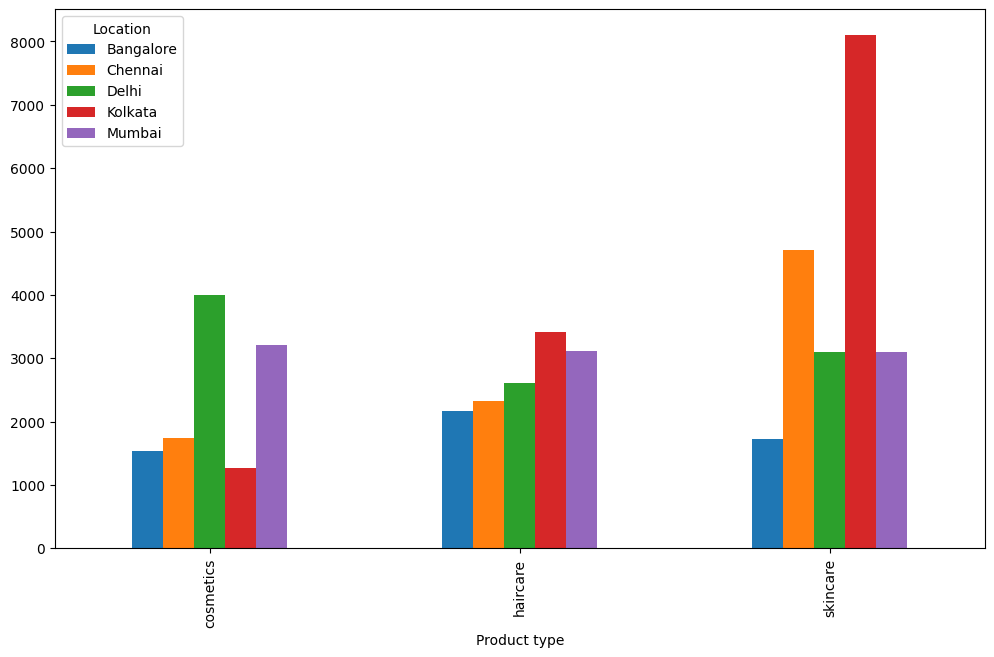

In [54]:
heatmap_data.plot(kind = 'bar' , figsize=(12,7))


*   Cosmetics --> Delhi

*  Haircare --> Kolkata

*  Skincare --> Skincare


  --
  

## Transportation Analysis

### Distribution of Transportation modes

In [55]:
indx = data['Transportation modes'].value_counts().index
values = data['Transportation modes'].value_counts().values


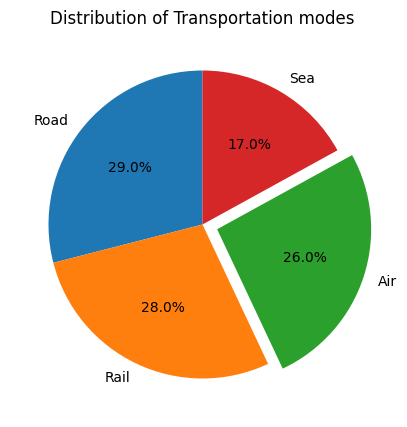

In [56]:
explode = (0, 0, 0.1,0)


plt.figure(figsize=(5, 5))
plt.pie(values, labels=indx, autopct='%1.1f%%', startangle=90,
        explode=explode
)
plt.title('Distribution of Transportation modes')
plt.show()

### Cost of Transportation modes for each Product

In [57]:
Transportation_cost = data.groupby(['Product type','Transportation modes'] , as_index=False)['Costs'].sum()

<Axes: xlabel='Product type', ylabel='Costs'>

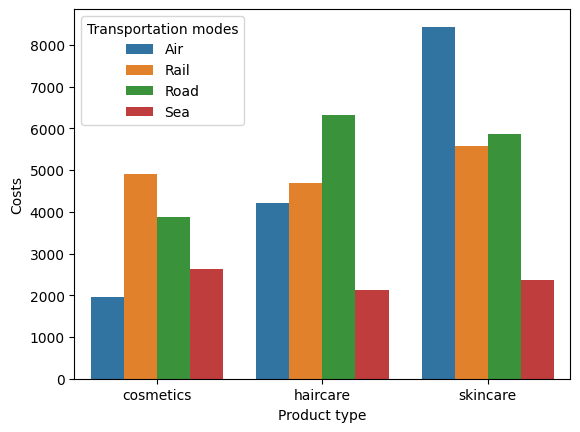

In [58]:
sns.barplot(data = Transportation_cost , x = 'Product type' , y ='Costs' , hue = 'Transportation modes')

--

### Transportation vs. Defect Rates

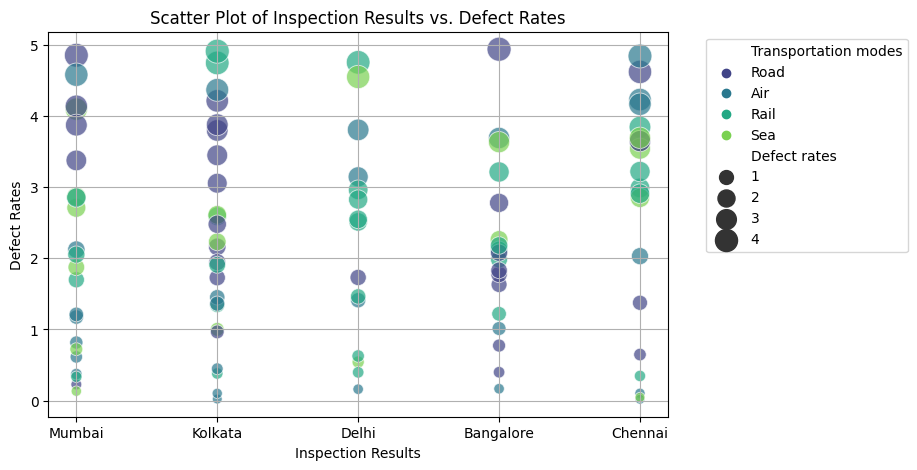

In [59]:
# Create a scatter plot with Seaborn
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(data=data, x='Location', y='Defect rates', size='Defect rates', sizes=(50, 300), hue='Transportation modes', palette='viridis', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Inspection Results vs. Defect Rates')
plt.xlabel('Inspection Results')
plt.ylabel('Defect Rates')

# Adjust the legend position outside the plot
plt.legend(title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)

# Show the plot
plt.show()


**the Transportation through the Road and Rail lose us , Sea is the Safest**

In [60]:
cost_ofTrans = data.groupby(['Location' , 'Product type' , 'Transportation modes'])['Costs'].mean().reset_index()

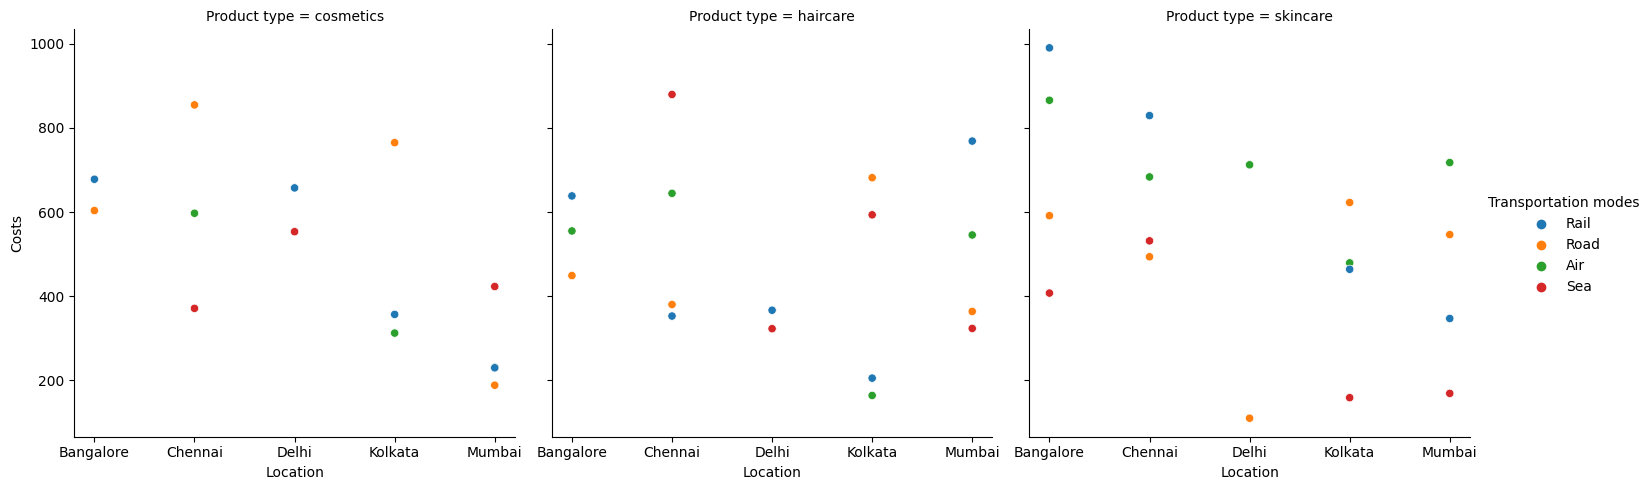

In [61]:
fig = sns.relplot(cost_ofTrans, x='Location', y='Costs' ,hue = 'Transportation modes' ,col = 'Product type')

**The cost of the Air is lowest and more safe it's good if we depend on it to import our Produts[Cosmetics , hairtcare] Specially from Kolkata and the Skin Care product it's good if we import it through Sea from Kolkata**